<a href="https://colab.research.google.com/github/kurt980/Python_Notes/blob/main/LC_DSA_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from typing import List

# **Before 2023-01-03**

**5. Longest Palindrome**
1. edge case
2. conditions have order

https://www.youtube.com/watch?v=dfIqLxAf-8s

**20. Valid Parentheses**
1. good use of queue

In [ ]:
class Solution:
    def isValid(self, s: str) -> bool:
      
        map = {')':'(', '}': '{', ']': '['}
        temp = []
        for c in s:
            if c in (')', '}', ']'):
                if not temp:
                    return False
                open = temp.pop(-1)
                if open != map[c]:
                    return False
            else:
                temp.append(c)

        return not temp

# **2023-01-03**

**5. Longest Palindrome**
1. edge case
2. conditions have order

https://www.youtube.com/watch?v=dfIqLxAf-8s

In [ ]:
class Solution:
    # # dp
    # def longestPalindrome(self, s: str) -> str:

    #     res = ''
    #     dpMat = [[0] * len(s) for _ in range(len(s))]

    #     for i in range(len(s)):
    #         dpMat[i][i] = True
    #         res = s[i]

    #     # traverse
    #     for i in range(len(s)-1,-1,-1):
             
    #          for j in range(i+1, len(s)):

    #              if s[i] == s[j]:
                    
    #                 if j - i == 1 or dpMat[i+1][j-1] is True:
    #                     dpMat[i][j] = True

    #                     if len(s[i:j+1]) > len(res):
    #                         res = s[i:j + 1]
        
    #     return res 

    # middle pointer
    def longestPalindrome(self, s: str) -> str:

        res = ''

        for i in range(0, len(s)):
            # odd palindrome
            l, r = i, i+1
            while l >= 0 and r < len(s):
                if s[l] != s[r]:
                    break
                if r - l + 1 > len(res):
                    res = s[l: r+1]
                l, r = l - 1, r + 1

            # even palindrome
            l, r = i, i
            while l >= 0 and r < len(s):
                if s[l] != s[r]:
                    break
                if len(res) < r - l + 1:
                    res = s[l : r + 1]

                l -= 1
                r += 1
        
        return res

# **2023-01-04**

**200. Longest Palindrome**
1. BFS is used to exhaust all neighboring points
2. use of deque() and set()

In [ ]:
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        # mark all points in an island
        def bfs(r,c):
            q = deque()
            q.append((r,c))
            visited.add((r,c))

            while q:
                row, col = q.popleft()
                dirs = [[1,0],[-1,0],[0,1],[0,-1]]

                for hor, ver in dirs:
                    r1 = row + hor
                    c1 = col + ver
                    if r1 in range(len(grid)) and c1 in range(len(grid[0])):
                        if grid[r1][c1] == "1" and (r1,c1) not in visited:
                            q.append((r1,c1))
                            visited.add((r1,c1))


        # initialize 
        res = 0
        visited = set()

        # search all points
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                # 
                if grid[i][j] == "1" and (i,j) not in visited:
                    bfs(i,j)
                    res += 1

        return res

**973. Longest Palindrome**
1. heapque is sorted by first value if a list

In [ ]:
class Solution:
    def kClosest(self, points: List[List[int]], k: int) -> List[List[int]]:

        for i in range(len(points)):
            x,y = points[i]
            dist = x**2 + y**2
            points[i] = [dist, x, y]

        # heapify
        heapq.heapify(points)

        res = []

        for i in range(k):
            dist, x, y = heapq.heappop(points)
            res.append([x,y])

        return res

# **2023-01-05**

**79. Word Search**
1. Fuck this shit

In [ ]:
class Solution:
    def exist(self, board: List[List[str]], word: str) -> bool:
        rows = len(board)
        cols = len(board[0])
        visited = set()

        # define dfs
        def dfs(r,c,i):
            # base case
            if i == len(word):
                return True

            # termination conditions
            if (r not in range(0, rows) or
                c not in range(0, cols) or
                i >= len(word) or
                board[r][c] != word[i] or
                (r,c) in visited
                ):
                return False
            # current is good
            visited.add((r,c))

            res = (dfs(r + 1, c, i + 1) or
                   dfs(r - 1, c, i + 1) or
                   dfs(r, c + 1, i + 1) or
                   dfs(r, c - 1, i + 1))
            
            visited.remove((r,c))

            return res


        # loop through all points
        for r in range(rows):
            for c in range(cols):
                # return any successful attempt
                if dfs(r,c,0): return True

        return False

**621. Task Scheduler**
1. I have no fucking idea, just memorize this shit

In [ ]:
class Solution:
    def leastInterval(self, tasks: List[str], n: int) -> int:
        # I have no fucking idea how this works, just memorize it.
        tasks.sort()

        # get frequency table
        freq = []
        count = 0
        prev = ''
        for t in tasks:
            if t == prev:
                pass
            else:
                freq.append(tasks.count(t))
                prev = t

        # reverse it
        tasks1 = [-f for f in freq]
        heapq.heapify(tasks1)

        # starts this shit
        q = deque()
        time = 0
        while tasks1 or q:
            time += 1
            # 
            if tasks1:

                task = heapq.heappop(tasks1)

                if task != -1:
                    q.append([task + 1, time + n])

            if q and q[0][1] == time:
                heapq.heappush(tasks1, q[0][0])
                q.popleft()
            

        return time
        

**78. Subsets**
1. Classic algorithm, need to memorize

In [ ]:
class Solution:
    def subsets(self, nums: List[int]) -> List[List[int]]:
        res = []
        subset = []

        def dfs(i):
            if i >= len(nums):
                res.append(subset.copy())
                return
            # include
            subset.append(nums[i])
            dfs(i + 1)

            # exclude
            subset.pop()
            dfs(i + 1)

        dfs(0)

        return res


**90. Subsets II**
1. This is fucking miserable, fuck it

In [ ]:
class Solution:
    def subsetsWithDup(self, nums: List[int]) -> List[List[int]]:
        nums.sort()
        res = []
        subset = []
        visited = set()

        def dfs(i):
            print(i)
            
            if i == len(nums):
                res.append(subset.copy())
                return

            if i < len(nums) and nums[i] not in visited:
                visited.add(nums[i])
            print(visited)
            # include
            subset.append(nums[i])
            dfs(i + 1)
            subset.pop()

            # exclude
            while i < len(nums) - 1 and nums[i] == nums[i + 1]:
                i += 1
            
            dfs(i + 1)

        dfs(0)

        return res


# **2023-01-06**

**133. Clone Graph**
1. Good algo, very tricky

In [ ]:
"""
# Definition for a Node.
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []
"""

class Solution:
    def cloneGraph(self, node: 'Node') -> 'Node':
        mapping = {}

        def dfs(node):

            if node in mapping:
                return mapping[node]

            copy = Node(node.val)
            mapping[node] = copy

            for nei in node.neighbors:
                temp = dfs(nei)
                copy.neighbors.append(temp)

            return copy


        return dfs(node) if node else None

# **2023-01-07**

**102. Binary Tree Level Order Traversal**
1. Good algo, bfs and record length of each level

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def levelOrder(self, root: Optional[TreeNode]) -> List[List[int]]: 

        def bfs(node): 

            if not node:
                return

            q = [node]
            res = [[node.val]]
            
            while q:

                level = len(q)
                cur = []

                for i in range(level):
                    temp = q.pop(0)
                    
                    if temp.left:
                        q.append(temp.left)
                        cur.append(temp.left.val)
                    if temp.right:
                        q.append(temp.right)
                        cur.append(temp.right.val)

                if cur:
                    res.append(cur)
            
            return res

        return bfs(root)

# **2023-01-07**

**199. Binary Tree Right Side View**
1. Good algo, very similar to the previous one

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def rightSideView(self, root: Optional[TreeNode]) -> List[int]:

        def bfs(node):

            if not node:
                return []
            
            q = [node]
            res = []

            while q:
                width = len(q)
                for i in range(width):
                    temp = q.pop(0)
                    if temp.left:
                        q.append(temp.left)
                    if temp.right:
                        q.append(temp.right)
                    
                    if i == width - 1:
                        res.append(temp.val)

            return res

        return bfs(root)

**200. Number of Islands**
1. Good algo, uses bfs
2. bfs uses queue structure, same for trees

In [ ]:
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        # mark all points in an island
        def bfs(r,c):
            q = deque()
            q.append((r,c))
            visited.add((r,c))

            while q:
                row, col = q.popleft()
                dirs = [[1,0],[-1,0],[0,1],[0,-1]]

                for hor, ver in dirs:
                    r1 = row + hor
                    c1 = col + ver
                    if r1 in range(len(grid)) and c1 in range(len(grid[0])):
                        if grid[r1][c1] == "1" and (r1,c1) not in visited:
                            q.append((r1,c1))
                            visited.add((r1,c1))


        # initialize 
        res = 0
        visited = set()

        # search all points
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                # 
                if grid[i][j] == "1" and (i,j) not in visited:
                    bfs(i,j)
                    res += 1

        return res

**695. Max Area of Island**
1. Very similar to the 695

In [ ]:
class Solution:
    def maxAreaOfIsland(self, grid: List[List[int]]) -> int:

        # mark all points in an island
        def bfs(r,c):
            number = 1
            q = deque()
            q.append((r,c))
            visited.add((r,c))

            while q:
                row, col = q.popleft()
                dirs = [[1,0],[-1,0],[0,1],[0,-1]]

                for hor, ver in dirs:
                    r1 = row + hor
                    c1 = col + ver
                    if r1 in range(len(grid)) and c1 in range(len(grid[0])):
                        if grid[r1][c1] == 1 and (r1,c1) not in visited:
                            q.append((r1,c1))
                            visited.add((r1,c1))
                            number += 1
            
            return number


        # initialize 
        res = 0
        visited = set()

        # search all points
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                # 
                if grid[i][j] == 1 and (i,j) not in visited:
                    cur = bfs(i,j)
                    res = max(res, cur)

        return res

**326. Power of Three**
1. I need to wash my brain

In [ ]:
class Solution:
    def isPowerOfThree(self, n: int) -> bool:
        res = False

        while n > 0:

            if n == 1:
                return True
            elif n < 3:
              return False
            else:
              n = n / 3


**231. Power of Two**
1. good use of the trunc() function

In [ ]:
class Solution:
    def isPowerOfTwo(self, n):
        return n > 0 and log2(n) == trunc(log2(n))

**203. Remove Linked List Elements**
1. good use of the trunc() function

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def removeElements(self, head: Optional[ListNode], val: int) -> Optional[ListNode]:
        
        if not head:
            return None

        nextNode = self.removeElements(head.next, val)

        if head.val == val:
            head = nextNode
        else:
            head.next = nextNode

        return head

**799. Champagne Tower**
1. Don't know why this is good, and should remember

In [ ]:
class Solution:
    def champagneTower(self, poured: int, query_row: int, query_glass: int) -> float:

        glasses = [[0] * (i+1) for i in range(query_row + 1)]
        glasses[0][0] = poured

        # fill glasses
        for i in range(len(glasses) - 1):
            for j in range(len(glasses[i])):
                extra = glasses[i][j] - 1
                glasses[i][j] = min(1, glasses[i][j])
                if extra > 0:
                    glasses[i + 1][j] += (extra / 2)
                    glasses[i + 1][j + 1] += (extra / 2)
        
        return min(1, glasses[query_row][query_glass])

# **2023-01-08**
**234. Palindrome Linked List**
1. Contains 2 algos: get to mid point and reverse linkedlist
2. uses only O(1) space

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def isPalindrome(self, head: Optional[ListNode]) -> bool:

        if not head:
            return None

        # get to mid point
        def reachMid(node):
            slow, fast = node, node
            while fast.next and fast.next.next:
                fast = fast.next.next
                slow = slow.next
            
            return slow

        # reverse list
        def reverse(head):

            prev, curr = None, head

            while curr:
                temp = curr.next
                curr.next = prev
                prev = curr
                curr = temp
            return prev
            
        
        # get to mid point, reverse latter part, use two pointers
        first = head
        node = head
        second = reachMid(node)
        second = reverse(second)


        while first and second:
            if first == second:
                return True
            
            if first.next == second or second.next == first:
                return first.val == second.val

            if first.val != second.val:
                return False

            first = first.next
            second = second.next

# **2023-01-08**
**355. Design Twitter**
1. very useless but need to pay attention

In [ ]:
class Twitter:

    def __init__(self):
        self.following = {}
        self.tweets = []

    def postTweet(self, userId: int, tweetId: int) -> None:
        self.tweets.append([userId, tweetId])
        if userId not in self.following:
            self.following[userId] = [userId]

    def getNewsFeed(self, userId: int) -> List[int]:
        newsFeed = []
        if userId in self.following:
            f = self.following[userId]
        else:
            return []
        for i in range(len(self.tweets) - 1, -1, -1):
            user, tweet = self.tweets[i]
            if user in f:
                newsFeed.append(tweet)
            if len(newsFeed) == 10:
                return newsFeed
        
        return newsFeed

    def follow(self, followerId: int, followeeId: int) -> None:
        if followerId in self.following:
            self.following[followerId].append(followeeId)
        else:
            self.following[followerId] = [followerId, followeeId]

    def unfollow(self, followerId: int, followeeId: int) -> None:
        if followerId in self.following:
            if followeeId in self.following[followerId]:
                self.following[followerId].remove(followeeId)


# Your Twitter object will be instantiated and called as such:
# obj = Twitter()
# obj.postTweet(userId,tweetId)
# param_2 = obj.getNewsFeed(userId)
# obj.follow(followerId,followeeId)
# obj.unfollow(followerId,followeeId)

# **2023-01-11**
**994. Rotting Oranges**
1. still bfs, but simultanuously for multiple points.

In [ ]:
class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:

        row, col = len(grid), len(grid[0])
        rotten = []
        q = deque()

        # get all fresh tomatoes
        fresh = []
        for i in range(row):
            for j in range(col):
                if grid[i][j] == 1:
                    fresh.append([i,j])
                if grid[i][j] == 2:
                    rotten.append([i,j])
                    q.append([i,j])

        time = 0

        # four directions
        dirs = [[0,1],[0,-1],[1,0],[-1,0]]

        while q and fresh:

            for i in range(len(q)):
                r, c = q.popleft()

                for h, v in dirs:
                    r1, c1 = r + h, c + v
                    if ((r1 in range(0, row) and c1 in range(0, col))
                        and grid[r1][c1] == 1 
                        and [r1, c1] not in rotten):

                        rotten.append([r1, c1])
                        q.append([r1, c1])
                        fresh.remove([r1, c1])
            
            time += 1

        return time if fresh == [] else -1


# **2023-01-12**
**207. Course Schedule**
1. dfs, need to understand the question
2. very important to remove in dfs

In [ ]:
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:

        # create hash map for dfs
        preMap = {i:[] for i in range(numCourses)}
        for a, b in prerequisites:
            preMap[a].append(b)
        
        #
        visited = set()

        # 
        def dfs(course):
            if course in visited:
                return False
            if preMap[course] == []:
                return True
            
            visited.add(course)

            for pre in preMap[course]:
                if dfs(pre) == False:
                    return False
                preMap[course].remove(pre)
            # why this? because 3 could be the parent of 1,if we do not remove 1, then 3 will return false
            visited.remove(course)
            return True

        for c in range(numCourses):
            if not dfs(c):
                return False
            
        return True
            

**210. Course Schedule II**
1. similar to previous, add section to remove redundancy

In [ ]:
class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
        # get hash map
        preMap = {i : [] for i in range(numCourses)}
        for i, j in prerequisites:
            preMap[i].append(j)

        #
        visited = set()
        cycle = set()
        self.res = []
        # dfs
        def dfs(course):
            # base
            if preMap[course] == []:
                if course not in self.res:
                    self.res.append(course)
                return True
            
            #
            if course in cycle:
                return False
            
            # 
            if course in visited:
                return True

            cycle.add(course)
            for pre in preMap[course]:
                if dfs(pre) == False:
                    return False
            
            cycle.remove(course)
            visited.add(course)

            if course not in self.res:
                self.res.append(course)

            return True

        for c in range(numCourses):
            if not dfs(c):
                return []
        
        return self.res

**1749. Maximum Absolute Sum of Any Subarray**
1. very tricky formula
2. user of accumulate, returns the accumulate sum, initial means the first value is 0, this is to find the case where the first one element is the answer
https://www.notion.so/Leetcode-1749-56f6c5e455104d4f85975d1fce12e539

In [ ]:
class Solution:
    def maxAbsoluteSum(self, nums: List[int]) -> int:
        
        return max(accumulate(nums, initial = 0)) - min(accumulate(nums, initial = 0))
        

In [ ]:
a = [-2,1,-3,4,-1,2,1,-5,4]

In [ ]:
import itertools

In [ ]:
x = itertools.accumulate(a)

In [ ]:
list(x)

[-2, -1, -4, 0, -1, 1, 2, -3, 1]

# **2023-01-21**
**55. Jump Game**
1. O(N) solution, very tricky

In [ ]:
class Solution:
    def canJump(self, nums: List[int]) -> bool:
        if len(nums) == 1:
            return True

        # doing backwards
        currGoal = len(nums) - 1
        for i in range(len(nums) - 2, -1, -1):
            # print('i', i)
            if currGoal - i <= nums[i]:
                if i == 0:
                    return True
                currGoal = i
            # print(currGoal)

        return False

**55. Jump Game**
1. O(N) solution, very tricky

Although your explanation is not perfect, the solution is great!

Let me reason the solution.

There are 2 possibilities - either the number of -ve numbers is even or odd.

If they are even, then obviously we would want to include all of them(in fact the whole array(unless for zeros)) to maximise the product. This is because multiplying an even number of -ve numbers would make the result +ve.

If they are odd, then we would want to exclude at most(to maximise the product) one -ve number from our product. So, now the question is, which -ve number to exclude? There are 2 possibilities - first -ve num or last -ve num.
a. Note that, you cannot exclude a -ve number that is not the first or the last, because, if you do so, you will need to exclude all(because you are breaking the product at this point) other -ve nums following that -ve number and then that needn't result in the maximum product.
b. Remember, that our goal is to leave out only 1 -ve number so that we can maximise our product.
c. Note: We are leaving out one -ve number, so that we are able to make the number of -ve nums even. Having said all that, now the question is whether to exclude the first -ve num or the last -ve num in the array. We can only know the answer by trying both.
d. By taking the product from the beginning of the array, you forcefully include the first -ve number and exclude the last -ve number
e. vice-versa for taking the product from the end

To further explain 2d,e, let me take an example:

Assume the array has an odd number of -ve nums. The first -ve num is -2 and the last -ve num is -3. So the array is .....-2.......-3.......
The maximum product can either be made of all numbers from the beginning of the array to the first non-zero number just before -3, or from the end of the array to the first non-zero number just after -2.

This is why we are considering two possible products, one from the beginning and one from the end.

But wait, you might be thinking, why we are still continuing to multiply even beyond -3(forward iteration) or beyond -2 (backward iteration). That's all actually waste, as the product is only going to increase in negativity beyond those points. The maximum is already updated, so this doesn't affect at all.

Hope you find this useful!

This is the reasoning I came up with. If there is anything wrong, please feel free to correct!

In [ ]:
class Solution:
    def maxProduct(self, nums: List[int]) -> int:
        res = -11
        prod = 1

        for n in nums:
            prod = prod * n
            res = max(prod, res)
            if n == 0:
                prod = 1

        
        prod = 1

        for i in range(len(nums)-1, -1, -1):
            prod = prod*nums[i]
            res = max(prod, res)
            if nums[i] == 0:
                prod = 1


        return res

**45. Jump Game II**
1. O(N) solution, very tricky

In [ ]:
class Solution:
    def jump(self, nums: List[int]) -> int:
        step = 0
        farthest = 0
        l,r = 0, 0
        #bfs
        while r < len(nums) - 1:
            
            for i in range(l, r + 1):
                farthest = max(farthest, i + nums[i])

            l, r = r + 1, farthest
            step += 1

        return step

**134. Gas Station**
1. First, this is very tricky, in that it involves some tricks about reading the question
2. Second, it is hard to come up with the for loop without some tricks

In [ ]:
class Solution:
    def canCompleteCircuit(self, gas: List[int], cost: List[int]) -> int:
        #
        diff = [g - c for g,c in zip(gas, cost)]
        length = len(gas)
        if sum(diff) < 0:
            return -1
        total = 0
        res = 0
        for i in range(length):
            total += diff[i]

            if total < 0:
                total = 0
                res = i + 1

        return res


**57. Insert Interval**
1. Came up with the important part (overlapping), but couldn't solve the other parts

In [ ]:
class Solution:
    def insert(self, intervals: List[List[int]], newInterval: List[int]) -> List[List[int]]:
        l, r = newInterval

        res = []

        if not intervals:
            return [newInterval]

        for i in range(len(intervals)):
            a,b = intervals[i]
            # print('cur:', intervals[i])
            # no overlapping
            if b < l:
                # print('smaller')
                res.append([a,b])
            
            elif a > r:
                # print('bigger')
                res.append(newInterval)
                return res + intervals[i: len(intervals)]

            else:
                # print('overlapping')
                l = min(l, a)
                r = max(r, b)
                newInterval = [l, r]

        return res + [newInterval]

# **2023-01-23**
**495. Teemo Attacking**
1. People say this is easy, geez, I used 1 hour to solve it

In [ ]:
class Solution:
    def findPoisonedDuration(self, timeSeries: List[int], duration: int) -> int:
        total = 0

        for i in range(1, len(timeSeries)):
            total += min(duration, timeSeries[i] - timeSeries[i - 1])

        return total + duration

**56. Merge Intervals**
1. Solved it indeed, but took too much time.
2. When dealing with intervals, remember to use min() and append last one

In [ ]:
class Solution:
    def merge(self, intervals: List[List[int]]) -> List[List[int]]:
        #
        intervals.sort()
        res = []
        l,r = intervals[0]
        for a,b in intervals:
            if r < a or l > b:
                res.append([l,r])
                l, r = a, b                
            else:
                l = min(l, a)
                r = max(r, b)
            
        res.append([l,r])

        return res

**435. Non-overlapping Intervals**
1. Very tricky

In [ ]:
class Solution:
    def eraseOverlapIntervals(self, intervals: List[List[int]]) -> int:
        intervals.sort()
        res = 0

        l,r = intervals[0]
        for a,b in intervals[1:]:
            if r <= a:
                r = b
            else:
                res += 1
                r = min(r, b)

        return res
        

**605. Can Place Flowers**
1. Boring, but fuck it man

In [ ]:
class Solution:
    def canPlaceFlowers(self, flowerbed: List[int], n: int) -> bool:
        if n <= 0:
            return True
        flowerbed = [0] + flowerbed + [0]
        for i in range(1, len(flowerbed) - 1):
            if flowerbed[i] == 0 and flowerbed[i - 1] == 0 and flowerbed[i + 1] == 0:
                n -= 1
                if n <= 0:
                    return True
                flowerbed[i] = 1
        # print(res)
        return False

# **2023-01-24**
**9. Palindrome Number**
1. Can convert to string
2. many edge cases

In [ ]:
class Solution:
    def isPalindrome(self, x: int) -> bool:
        # edge case
        if x < 0:
            return False
        # edge case
        if x % 10 == 0:
            return x == 0

        reverse = 0

        while x > reverse:
            curr = x % 10
            reverse = reverse * 10 + curr
            print(x, reverse)
            if x == reverse:
                return True
            x = x // 10

        return x == reverse

**13. Roman to Integer**
1. Dont know if theres faster solutions

In [ ]:
class Solution:
    def romanToInt(self, s: str) -> int:

        hashMap = {'I': 1, 'V': 5, 'X': 10, 'L':50, 'C': 100, 'D': 500, 'M':1000,
                    'IV': 4, 'IX': 9, 'XL': 40, 'XC': 90, 'CD': 400, 'CM': 900}

        i = 0
        res = 0

        while i < len(s):
            # check double digits
            if i < len(s) - 1 and s[i:i+2] in hashMap:
                res += hashMap[s[i:i+2]]
                i += 2
            else:
                res += hashMap[s[i]]
                i += 1

        return res

**997. Find the Town Judge**
1. Very clever solution

In [ ]:
class Solution:
    def findJudge(self, n: int, trust: List[List[int]]) -> int:
        
        if n == 1:
            return 1
        
        diff = [0] * (n + 1)

        for i,j in trust:
            diff[i] -= 1
            diff[j] += 1

        for i in range(len(diff)):

            if diff[i] == (n-1):
                return i

        return -1

# **2023-01-25**
**14. Longest Common Prefix**
1. 很多种解法，各种答案都可以看一看
https://leetcode.com/problems/longest-common-prefix/description/

In [ ]:
class Solution:
    def longestCommonPrefix(self, strs: List[str]) -> str:
        res = strs[0]

        for s in strs[1:]:
            for i in range(len(res)):

                if i >= len(s) or s[i] != res[i]:
                    res = res[0:i]
                    break

        return res


# **2023-01-26**
**208. Implement Trie (Prefix Tree)**
1. very classic algorithm
2. much faster than using a list

In [ ]:
class TrieNode:
    def __init__(self):
        # use dictionary as a tree
        self.children = {}
        self.endOfWord = False

class Trie:

    def __init__(self):
        self.root = TrieNode()

    def insert(self, word: str) -> None:
        # just like a tree
        cur = self.root

        for c in word:
            if c not in cur.children:
                cur.children[c] = TrieNode()
            cur = cur.children[c]

        cur.endOfWord = True

    def search(self, word: str) -> bool:
        # 
        cur = self.root

        for c in word:
            if c not in cur.children:
                return False
            cur = cur.children[c]
        
        return cur.endOfWord

    def startsWith(self, prefix: str) -> bool:
        #
        cur = self.root

        for c in prefix:
            if c not in cur.children:
                return False
            cur = cur.children[c]
        
        return True
            

# **2023-01-28**
**211. Design Add and Search Words Data Structure**
1. use a partial bfs, although the implementation is not very clear
2. dfs is going to the last and going backwards, need to revisit

In [ ]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.endOfWord = False

class WordDictionary:

    def __init__(self):
        self.root = TrieNode()

    def addWord(self, word: str) -> None:
        curr = self.root
        for c in word:
            if c not in curr.children:
                curr.children[c] = TrieNode()         
            curr = curr.children[c]            
        
        curr.endOfWord = True
     
    def search(self, word: str) -> bool:
        # like a partial dfs
        def dfs(i, node):
            curr = node

            for j in range(i, len(word)):
                c = word[j]
                if c == ".":
                    # each item is a node
                    for child in curr.children.values():
                        # dfs until next letter
                        if dfs(j + 1, child):
                            return True
                    return False
                else:
                    if c not in curr.children:
                        return False
                    curr = curr.children[c]
            
            return curr.endOfWord

        return dfs(0, self.root)

**From Codesignal**
1. isdigit()
2. lexicographical

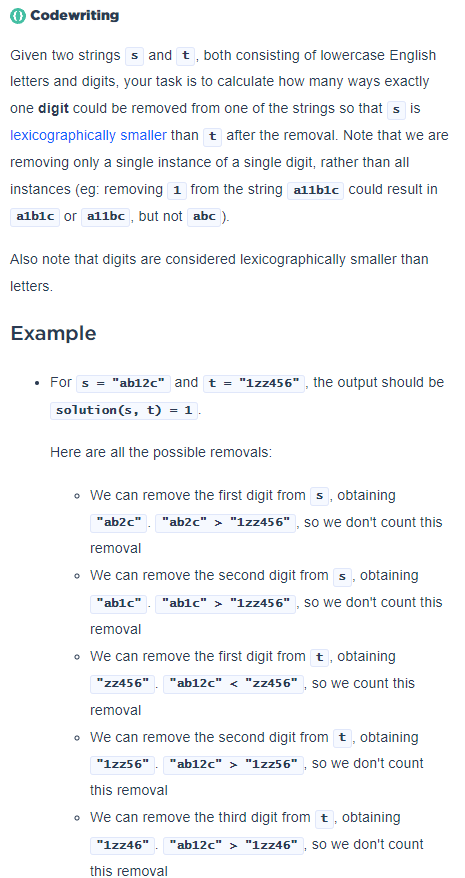

In [ ]:
def solution(s, t):
    res = 0
    
    for i in range(len(s)):
        if s[i].isdigit():
            temp = s[0:i] + s[i + 1:]
            
            if temp < t:
                res += 1
                
    for i in range(len(t)):
        if t[i].isdigit():
            temp = t[0:i] + t[i + 1:]
            
            if s < temp:
                res += 1
    
    return res

**From Codesignal**
1. Use log10(n), not log(n,10)
2. Math formula is faster than iteration

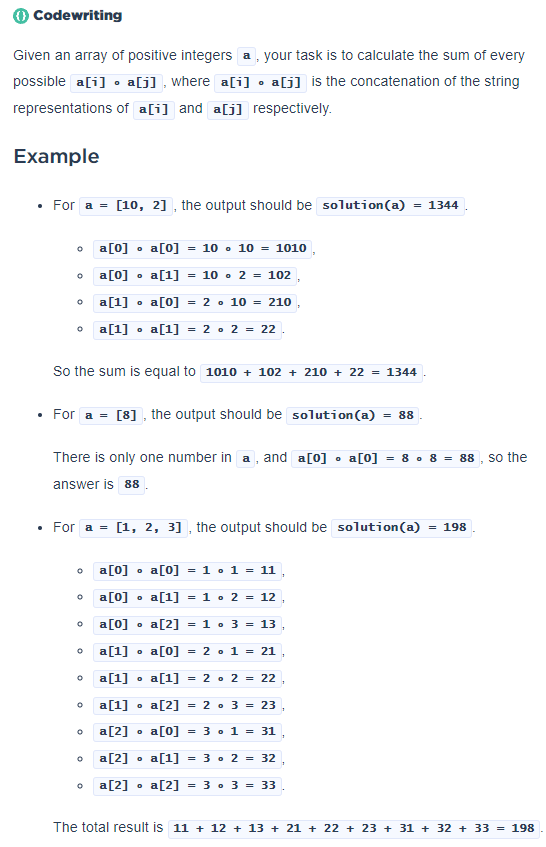

In [ ]:
def solution(a):
    multiplier = 0
    length = 0
    total = 0
    
    for n in a:
        length += 1
        # check number of digits in a
        digit = math.floor(math.log10(n))

        multiplier += 10 ** (digit + 1)
        total += n
    
    return (total) * (length + multiplier)


# **2023-01-29**
**26. Remove Duplicates from Sorted Array**
1. This is so fucking weird, but might be useful
2. uses two pointers, don't delete anything, simply adding new element behind

In [ ]:
class Solution:
    def removeDuplicates(self, nums: List[int]) -> int:
        k = 0
        prev = nums[0]
        i = 1
        j = 1
        while i < len(nums):
            print(nums[i])
            if nums[i] == prev:
                k += 1
            else:
                prev = nums[i]
                nums[j] = nums[i]
                j += 1
            i += 1

        return (len(nums) - k)

**415. Add Strings**
1. 两个技巧：从头插入列表用insert(0,c)；反转列表或者字符串都用[::-1]
2. 使用ord()-ord('0')来获得当前字符串的值
3. ''.join()可以用来串接所有列表中字符串

In [ ]:
class Solution:
    def addStrings(self, num1: str, num2: str) -> str:
        res = []

        i,j = len(num1) - 1, len(num2) - 1
        carry = 0

        while i >= 0 or j >= 0:
            print(i,j)
            curr = 0
            if i >= 0:
                curr += (ord(num1[i]) - ord('0'))
            if j >= 0:
                curr += (ord(num2[j]) - ord('0'))

            curr += carry
            carry = curr // 10
            curr = curr % 10

            res.insert(0, str(curr))
            i -= 1
            j -= 1

        if carry == 1:
            res.insert(0, str(carry))

        return ''.join(res)


# **2023-01-30**
**17. Letter Combinations of a Phone Number**
1. Exactly the same as subsets, using backtracking

In [ ]:
class Solution:
    def letterCombinations(self, digits: str) -> List[str]:
        num_to_letter = {'2':'abc','3':'def','4':'ghi','5':'jkl','6':'mno','7':'pqrs','8':'tuv','9':'wxyz'}
        self.res = []
        self.curr = ''

        # backtracking
        def dfs(s):

            if len(s) == 0:
                self.res.append(self.curr)
                return
            
            n = s[0]

            if n in num_to_letter:
                for c in num_to_letter[n]:
                    self.curr += c
                    dfs(s[1:])
                    self.curr = self.curr[0:len(self.curr) - 1]
        
        if not digits:
            return []

        dfs(digits)

        return self.res

# **2023-02-05**
**73. Set Matrix Zeroes**
1. This is so fucking miserable, bitch

In [ ]:
class Solution:
    def setZeroes(self, matrix: List[List[int]]) -> None:
        """
        Do not return anything, modify matrix in-place instead.
        """
        # You can use O(mn) by copying the matrix, O(m+n) by using 2 lists, O(1) by 
        
        # first loop through the matrix to get locations of 0s
        # get first row and check if there's 0
        first_row = False

        for i in range(0, len(matrix)):
            for j in range(0, len(matrix[0])):
                if matrix[i][j] == 0:
                    if i == 0:
                        first_row = True
                        matrix[0][j] = 0
                    else:
                        matrix[0][j] = 0
                        matrix[i][0] = 0

        # print(matrix, first_row)

        # then loop though it again to modify the rows
        for i in range(1, len(matrix)):
            if matrix[i][0] == 0:   
                for j in range(len(matrix[0])):
                    matrix[i][j] = 0

        # print(matrix)

        # then loop through it again to modify the columns
        for j in range(len(matrix[0])):
            if matrix[0][j] == 0:        
                for i in range(len(matrix)):
                    matrix[i][j] = 0
        
        # print(matrix)
        
        # check first row
        if first_row:
            for j in range(len(matrix[0])):
                matrix[0][j] = 0


# **2023-02-07**
**27. Remove Element**
1. I don't know what trick this is, but it looks legit.

In [ ]:
class Solution:
    def removeElement(self, nums: List[int], val: int) -> int:
        i = 0
        for n in nums:
            if n != val:
                nums[i] = n
                i += 1
        
        return i